In [1]:
library("devtools")
library("tidyverse")

Loading required package: usethis

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.1          v readr     2.1.4     
v forcats   1.0.0.9000     v stringr   1.5.0     
v ggplot2   3.4.2          v tibble    3.2.1     
v lubridate 1.9.2          v tidyr     1.3.0     
v purrr     1.0.1          
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
zm_all_data <- readRDS("/scratch/jpm73279/comparative_single_cell/07.call.ACRs/03.peak_assignment/zm/zm_acr_classification.no_exons.combined_data.rds")

In [3]:
zm_all_pvalues <- read_delim("/scratch/jpm73279/comparative_single_cell/07.call.ACRs/03.peak_assignment/zm/zm_acr_classification.no_exons.all_pvalues.csv", delim = ",")

Rows: 333024 Columns: 7
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (2): ACR_values, cell_type
dbl (5): perm_pval, perm_pval_lower, perm_pval_upper, pnorm_pval, z_score

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [18]:
glimpse(zm_all_data)

Rows: 333,024
Columns: 16
$ ACR_values          <chr> "scACR_1", "scACR_1", "scACR_1", "scACR_1", "scACR~
$ cell_type           <chr> "bundle_sheath", "companion_cells_sieve_elements",~
$ distribution        <list> [<tbl_df[1000 x 1]>], [<tbl_df[1000 x 1]>], [<tbl~
$ null_dist           <list> [<tbl_df[29148 x 1]>], [<tbl_df[29148 x 1]>], [<t~
$ list_len            <dbl> 29149, 29149, 29149, 29149, 29149, 29149, 30001, 3~
$ median_val          <dbl> 5.231422, 5.095063, 5.148097, 4.994341, 5.376736, ~
$ conf_interval_lower <dbl> 5.014216, 4.705510, 4.893113, 4.687311, 5.281763, ~
$ conf_interval_upper <dbl> 5.395728, 5.330726, 5.354350, 5.223475, 5.500966, ~
$ med_val_perm        <int> 12296, 9665, 10668, 7324, 19998, 11076, 13014, 805~
$ perm_pval           <dbl> 0.42183265, 0.33157227, 0.36598168, 0.25126076, 0.~
$ perm_pval_lower     <dbl> 0.26789941, 0.11406909, 0.16751861, 0.11279975, 0.~
$ perm_pval_upper     <dbl> 0.7206765, 0.6211877, 0.6453738, 0.4069779, 0.8405~
$ null_dist_me

In [6]:
options(repr.plot.width=15, repr.plot.height=15)
#Bad looking on browser - edge of Sig
look_group <- c("scACR_12817", "scACR_13067", "scACR_14828")
plot_acr_null_real <- zm_all_data %>% 
    ungroup() %>% 
    dplyr::filter(ACR_values %in% look_group) 

In [26]:
## Generate the same plot looking at ACRs associated with marker genes 
options(repr.plot.width=15, repr.plot.height=15)
#Bad looking on browser - edge of Sig
look_group <- c("scACR_12817", "scACR_13067", "scACR_14828")
plot_acr_null_real <- zm_all_data %>% 
    ungroup() %>% 
    dplyr::filter(ACR_values %in% look_group) %>% 
    dplyr::filter(cell_type %in% c("epidermis", "companion_cells_sieve_elements", "mesophyll")) %>% 
    mutate(ACR_values = factor(ACR_values, levels = look_group)) %>%  # Reorder the levels of ACR_values
    unnest(distribution) %>% 
    rename(real_value = value) %>% 
    unnest(null_dist)%>% 
    rename(null_value = value) %>% 
    pivot_longer(c(real_value,null_value), names_to = "class", values_to = "val") 

In [28]:
acr_meds <- plot_acr_null_real %>% 
    group_by(class, cell_type, ACR_values) %>% 
    summarise(median_val = mean(val))
 
cell_type_specific_plots <- ggplot(plot_acr_null_real, aes(val, color = class)) + geom_density() + geom_density(alpha = 0.1) + 
    facet_grid(ACR_values~cell_type, scales="free_y") +
      geom_vline(data=acr_meds, aes(xintercept=median_val, color=class),
             linetype="dashed") + theme_half_open() + panel_border()

`summarise()` has grouped output by 'class', 'cell_type'. You can override
using the `.groups` argument.


`summarise()` has grouped output by 'class', 'cell_type'. You can override
using the `.groups` argument.


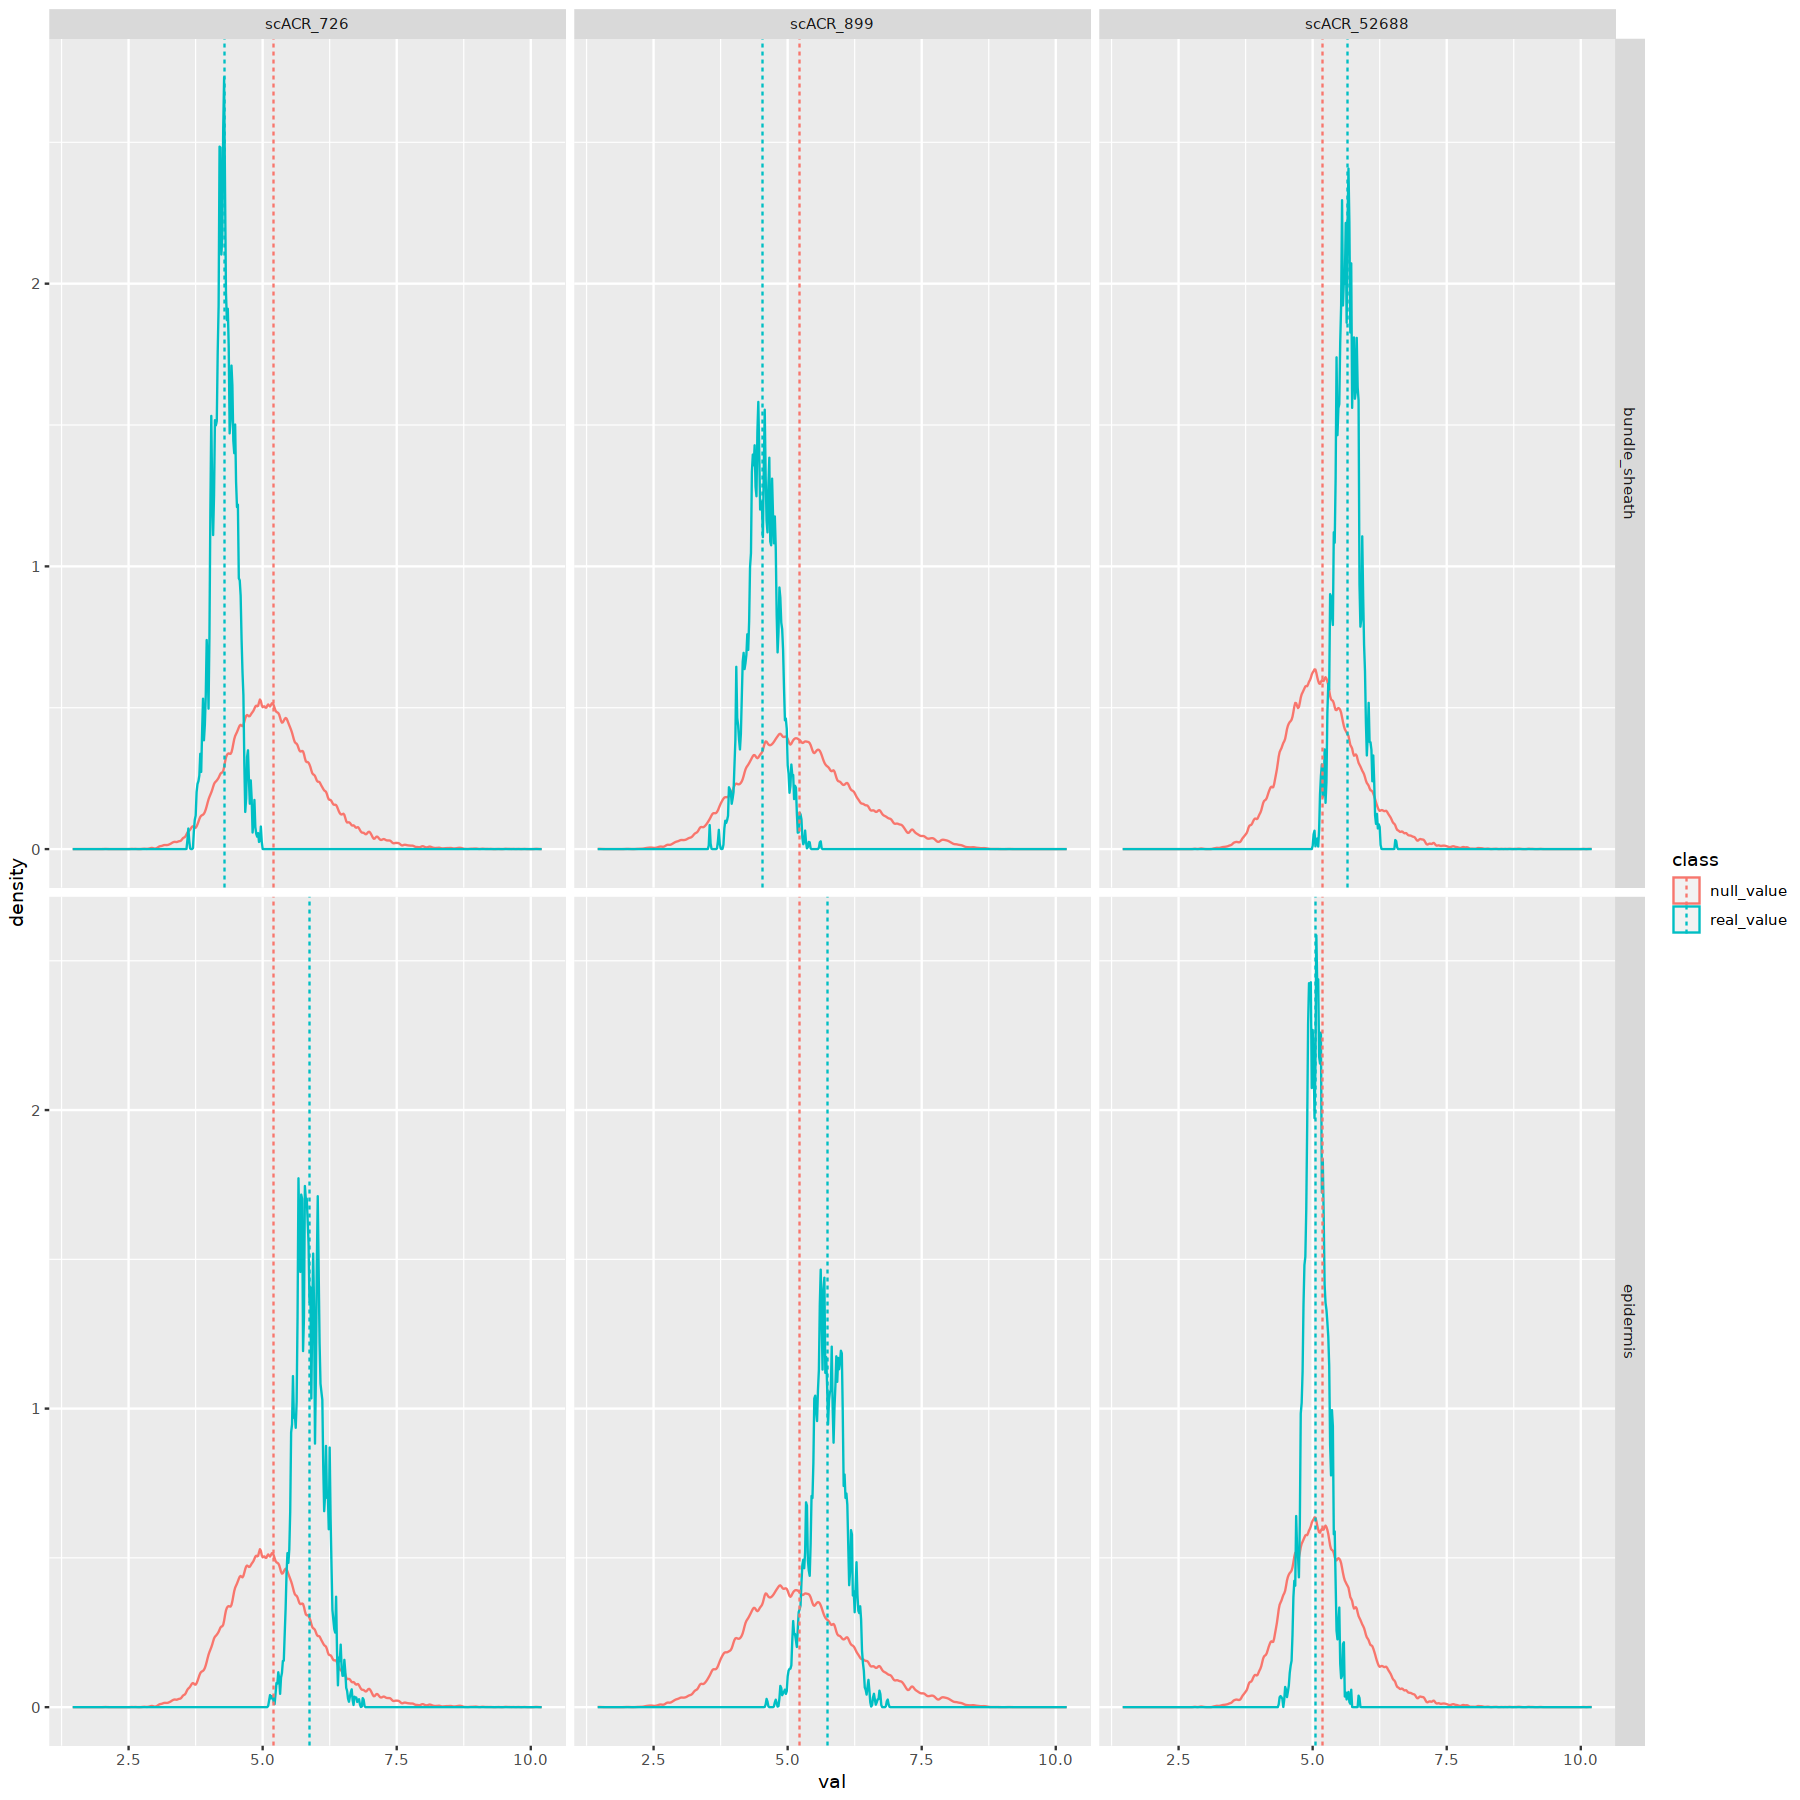

In [13]:
#Broadly ACC ACRs
## Generate the same plot looking at ACRs associated with marker genes 
options(repr.plot.width=15, repr.plot.height=15)
#Bad looking on browser - edge of Sig
look_group <- c("scACR_726", "scACR_899", "scACR_52688")
plot_acr_null_real <- zm_all_data %>% 
    ungroup() %>% 
    dplyr::filter(ACR_values %in% look_group) %>% 
    dplyr::filter(cell_type %in% c("epidermis", "bundle_sheath")) %>% 
    mutate(ACR_values = factor(ACR_values, levels = look_group)) %>%  # Reorder the levels of ACR_values
    unnest(distribution) %>% 
    rename(real_value = value) %>% 
    unnest(null_dist)%>% 
    rename(null_value = value) %>% 
    pivot_longer(c(real_value,null_value), names_to = "class", values_to = "val") 

acr_meds <- plot_acr_null_real %>% 
    group_by(class, cell_type, ACR_values) %>% 
    summarise(median_val = mean(val))
 
ggplot(plot_acr_null_real, aes(val, color = class)) + geom_density() + facet_grid(ACR_values~cell_type, scales="free_y") +
      geom_vline(data=acr_meds, aes(xintercept=median_val, color=class),
             linetype="dashed")

In [15]:
glimpse(plot_acr_null_real)

Rows: 360,000,000
Columns: 16
$ ACR_values          <fct> scACR_52688, scACR_52688, scACR_52688, scACR_52688~
$ cell_type           <chr> "bundle_sheath", "bundle_sheath", "bundle_sheath",~
$ list_len            <dbl> 30001, 30001, 30001, 30001, 30001, 30001, 30001, 3~
$ median_val          <dbl> 5.649879, 5.649879, 5.649879, 5.649879, 5.649879, ~
$ conf_interval_lower <dbl> 5.228112, 5.228112, 5.228112, 5.228112, 5.228112, ~
$ conf_interval_upper <dbl> 6.094103, 6.094103, 6.094103, 6.094103, 6.094103, ~
$ med_val_perm        <int> 23028, 23028, 23028, 23028, 23028, 23028, 23028, 2~
$ perm_pval           <dbl> 0.7675744, 0.7675744, 0.7675744, 0.7675744, 0.7675~
$ perm_pval_lower     <dbl> 0.5547482, 0.5547482, 0.5547482, 0.5547482, 0.5547~
$ perm_pval_upper     <dbl> 0.90057, 0.90057, 0.90057, 0.90057, 0.90057, 0.900~
$ null_dist_mean      <dbl> 5.185409, 5.185409, 5.185409, 5.185409, 5.185409, ~
$ null_dist_sd        <dbl> 0.7062577, 0.7062577, 0.7062577, 0.7062577, 0.7062~
$ pnorm_pv

In [22]:
library(cowplot)

brroadly_accessible_ACRs <- ggplot(plot_acr_null_real, aes(val, color = class)) + geom_density(alpha = 0.1) + facet_grid(ACR_values~cell_type, scales="free_y") +
      geom_vline(data=acr_meds, aes(xintercept=median_val, color=class),
             linetype="dashed") + theme_half_open() + panel_border()


In [24]:
#options(repr.plot.width=15, repr.plot.height=10)
#brroadly_accessible_ACRs
ggsave(filename = "/home/jpm73279/data_copy_over/comparative_single_cell_imgs/gordon_conference/broadly_acc_ACRs.pdf", plot = brroadly_accessible_ACRs, device = "pdf", width = 15, height = 10)

In [30]:
ggsave(filename = "/home/jpm73279/data_copy_over/comparative_single_cell_imgs/gordon_conference/cell_type_specific.ACRs.pdf", plot = cell_type_specific_plots, device = "pdf", width = 15, height = 15)

